### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
library(tidyverse)
library(dplyr)
library(xts)
library(lubridate)
library(ggplot2)



chi <- read_csv(
  "chicago.csv", 
  col_types = cols(
    `End Time` = col_datetime(format = "%Y-%m-%d %H:%M:%S"), 
    `Start Time` = col_datetime(format = "%Y-%m-%d %H:%M:%S"), 
    X1 = col_skip()
  )
)

ny<- read_csv(
  "new_york_city.csv", 
  col_types = cols(
    `End Time` = col_datetime(format = "%Y-%m-%d %H:%M:%S"), 
    `Start Time` = col_datetime(format = "%Y-%m-%d %H:%M:%S"), 
    X1 = col_skip()
  )
)

wash<- read_csv(
  "washington.csv", 
  col_types = cols(
    `End Time` = col_datetime(format = "%Y-%m-%d %H:%M:%S"), 
    `Start Time` = col_datetime(format = "%Y-%m-%d %H:%M:%S"), 
    X1 = col_skip()
  )
)

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning mess

In [2]:
head(ny)
dim(ny)

Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


[1] 300000      8

In [3]:
head(wash)
dim(wash)


Start Time,End Time,Trip Duration,Start Station,End Station,User Type
2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


[1] 300000      6

In [4]:
head(chi)
dim(chi)

Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


[1] 300000      8

In [5]:
## Before awnsaring to the questions I'm going to concatenate the three datasets for more efficacity 

In [6]:
## adding city name vector for New-York data frame

City<-rep('new_york',nrow='ny')
ny1<-cbind(ny,City)

In [7]:
## addind city name vector to Chicago data frame

City<-rep('chicago',nrow='chi')
chi1<-cbind(chi,City)


In [8]:
## adding city name,Gender and Birth.year vectors to Washington data frame

Gender<- rep('', nrow='wash') 

`Birth Year`<- rep('',nrow='wahs')

City<-rep('washington',nrow='wash')

wash1<-cbind(wash,Gender,`Birth Year`,City)

In [9]:
## Combining the three cities data frames

BS<-rbind(chi1,ny1,wash1)


In [10]:
head(BS)

Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,City
2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,chicago
2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,chicago
2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981,chicago
2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986,chicago
2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975,chicago
2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990,chicago


In [22]:
## We're going to add month day,and hour columns fort the start time before responding to that question

BS<-BS %>% mutate(STARTMONTH=format(`Start Time`,"%b"))%>% mutate(STARTDAY=format(`Start Time`,"%a"))%>% mutate(STARTHOUR=hour(`Start Time`))

In [12]:
## We have three new colums respectively called STARTMONTH for the month,STARTDAY for the day and STARTHOUR for the hour
head(BS)
dim(BS)


Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,City,STARTMONTH,STARTDAY,STARTHOUR
2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,chicago,Jun,Fri,15
2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,chicago,May,Thu,18
2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981,chicago,Jan,Wed,8
2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986,chicago,Mar,Mon,13
2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975,chicago,Jan,Tue,14
2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990,chicago,Jun,Mon,9


[1] 900000     12

### Question 1


**Your question 1 goes here.**

In [13]:
## What is the most common month occurs most often in the start time?

Warning message:
"Removed 23 rows containing non-finite values (stat_count)."

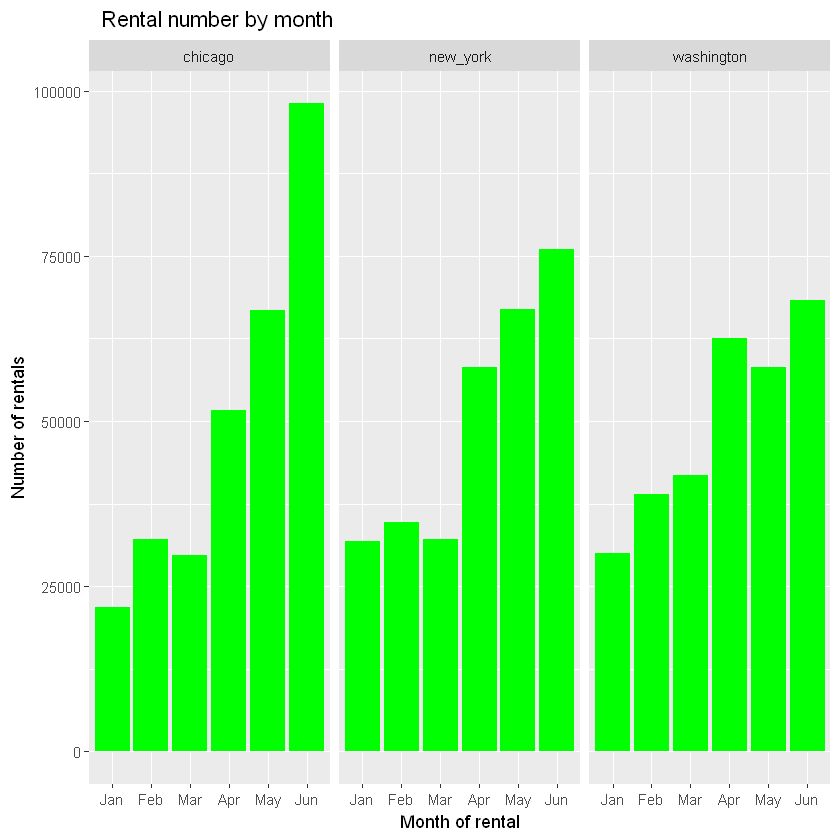

In [24]:
ggplot(aes(x=STARTMONTH ),data = BS)+
    geom_bar(fill="green")+
    ggtitle('  Rental number by month')+
    xlab('Month of rental')+
    ylab('Number of rentals')+
  scale_x_discrete(limits= c('Jan','Feb','Mar','Apr','May','Jun'))+
   facet_wrap(~City)

** The most popular month for the three cities is June . We could explain this trend  by the fact that june is a month of holidays so people have more time to use bike**


### Question 2

**What is the most common hour of day?**

Warning message:
"Removed 23 rows containing non-finite values (stat_count)."

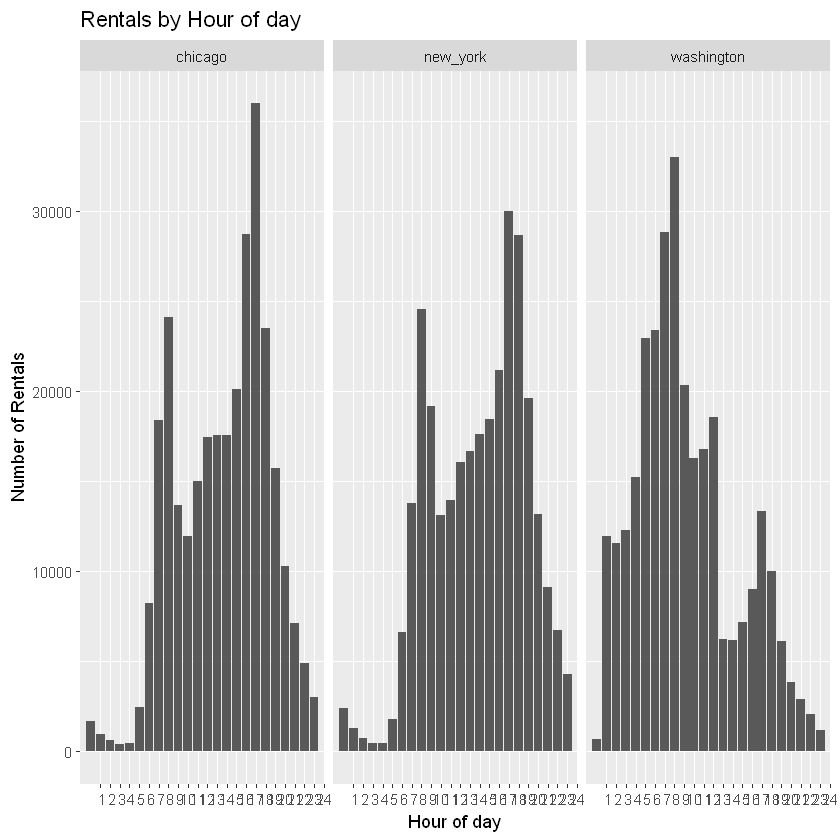

In [15]:
ggplot(aes(x=STARTHOUR),data = BS,bins=0.01)+
  geom_bar()+
  ggtitle('Rentals by Hour of day')+
  xlab('Hour of day')+
  ylab('Number of Rentals')+
  scale_x_discrete(limits = seq(1,24,1))+
  facet_wrap(~City)


In [16]:
by(BS$STARTHOUR,BS$City,summary)

BS$City: chicago
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   10.00   14.00   13.69   17.00   23.00 
------------------------------------------------------------ 
BS$City: new_york
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   10.00   15.00   13.93   18.00   23.00      23 
------------------------------------------------------------ 
BS$City: washington
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   6.000   8.000   9.205  12.000  23.000 

**The most common hour of day in Chicago and New York is 18H, and for Wachington it's 8H. It seams like people in Chicago and New york use bikes very often in the evening,and Washington people prefer the morning**

### Question 3

**## What is the most common Start station?**

In [17]:
## let's have a code that will give us the max rental by START Station  for each three cities

In [18]:
Station.agg<-BS %>% group_by(City, `Start Station`) %>% 
  summarise(stat.count=n()) %>%
  filter(stat.count == max(stat.count)) %>%
  ungroup()

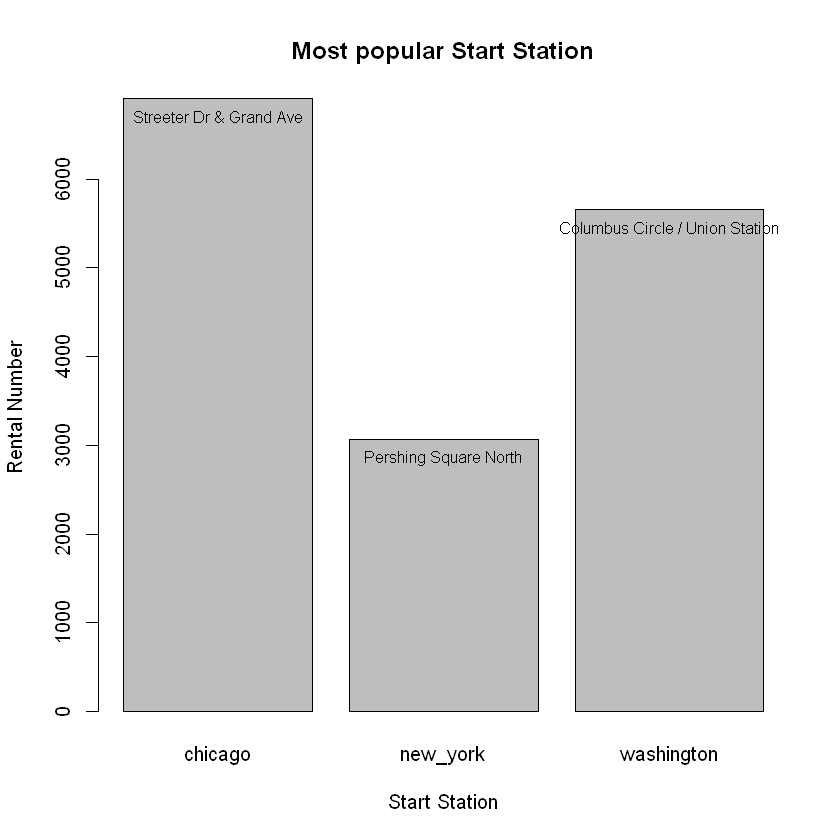

In [19]:
## let's build our plot
bp <- barplot(Station.agg$stat.count, names.arg = Station.agg$City,xlab='Start Station',ylab='Rental Number')
text(bp,title('Most popular Start Station'), y = Station.agg$stat.count, labels = Station.agg$`Start Station`, pos = 1, cex = 0.8)


**The most common Start Station in Chicago is 'Streeter Dr & Grand Ave, 'Pershing Square North' for New York City, and 'Columbus Circle/Union' Station for Washington.**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [20]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')

[1] 0